# **Predicting Alzheimers Disease**

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, precision_score
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

Drop Unnecessary columns

In [ ]:
alzheimer = pd.read_csv('/content/oasis_longitudinal.csv')
#alzheimer = alzheimer.replace('Converted','Demented')
alzheimer_Modified = alzheimer.drop("Subject ID", axis = 1)
alzheimer_Modified = alzheimer_Modified.drop("MRI ID", axis = 1)
alzheimer_Modified = alzheimer_Modified.drop("eTIV", axis = 1)
alzheimer_Modified = alzheimer_Modified.drop("nWBV", axis = 1)
alzheimer_Modified = alzheimer_Modified.drop("ASF", axis = 1)
alzheimer_Modified = alzheimer_Modified.drop("MR Delay", axis = 1)
alzheimer_Modified.dropna(inplace=True)
alzheimer_Modified

,Group,Visit,M/F,Hand,Age,EDUC,SES,MMSE,CDR
0,Nondemented,1,M,R,87,14,2.0,27.0,0.0
1,Nondemented,2,M,R,88,14,2.0,30.0,0.0
5,Nondemented,1,F,R,88,18,3.0,28.0,0.0
6,Nondemented,2,F,R,90,18,3.0,27.0,0.0
7,Nondemented,1,M,R,80,12,4.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...
368,Demented,2,M,R,82,16,1.0,28.0,0.5
369,Demented,3,M,R,86,16,1.0,26.0,0.5
370,Nondemented,1,F,R,61,13,2.0,30.0,0.0
371,Nondemented,2,F,R,63,13,2.0,30.0,0.0


Define Predictor Variable(x) and Target Variable(y)

In [ ]:
np.random.seed(42)
x = alzheimer_Modified.drop("Group", axis = 1)
y = alzheimer_Modified["Group"]

Encode Data with one hot encoder

In [ ]:
features = ['M/F', 'Hand']
one_hot = OneHotEncoder()
transform = ColumnTransformer([('one_hot', one_hot, features)], remainder='passthrough')
transfromed_X = transform.fit_transform(x)
pd.DataFrame(transfromed_X)

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,1.0,1.0,87.0,14.0,2.0,27.0,0.0
1,0.0,1.0,1.0,2.0,88.0,14.0,2.0,30.0,0.0
2,1.0,0.0,1.0,1.0,88.0,18.0,3.0,28.0,0.0
3,1.0,0.0,1.0,2.0,90.0,18.0,3.0,27.0,0.0
4,0.0,1.0,1.0,1.0,80.0,12.0,4.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...
349,0.0,1.0,1.0,2.0,82.0,16.0,1.0,28.0,0.5
350,0.0,1.0,1.0,3.0,86.0,16.0,1.0,26.0,0.5
351,1.0,0.0,1.0,1.0,61.0,13.0,2.0,30.0,0.0
352,1.0,0.0,1.0,2.0,63.0,13.0,2.0,30.0,0.0


A method to evaluate our models



In [ ]:
def evaluation_pred(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred,
                              pos_label='positive',
                              average='micro')
  recall = recall_score(y_true, y_pred,
                        pos_label='positive',
                        average='micro')
  f1 = f1_score(y_true, y_pred,
                        pos_label='positive',
                        average='micro')
  martic_dict = {"Accuracy": round(accuracy, 2),
                 "precision": round(precision, 2),
                 "recall": round(recall, 2),
                 "f1": round(f1, 2)}

  print(f"accuracy: {accuracy * 100:.2f}%")
  print(f"percision {precision:.2f}")
  print(f"recall {recall:.2f}")
  print(f"f1: {f1:.02f}")

  return martic_dict

Spliting dataset into train and text dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(transfromed_X, y, test_size=0.2)

In [ ]:
#import pickle

#pickle.dump(rs_clf, open("RandomForestCV", "wb"))

Hyperparameter tuning for the GaussianNB model

In [ ]:
parameters = {
    'priors': [None],
    'var_smoothing': [ 0.000000001]
}

cv_gnb = GridSearchCV(estimator=GaussianNB(), param_grid=parameters, cv = 5, verbose=2)
cv_gnb.fit(x_train, y_train)
y_pred_gnb = cv_gnb.predict(x_test)
evaluation_pred(y_test, y_pred_gnb)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] priors=None, var_smoothing=1e-09 ................................
[CV] ................. priors=None, var_smoothing=1e-09, total=   0.0s
[CV] priors=None, var_smoothing=1e-09 ................................
[CV] ................. priors=None, var_smoothing=1e-09, total=   0.0s
[CV] priors=None, var_smoothing=1e-09 ................................
[CV] ................. priors=None, var_smoothing=1e-09, total=   0.0s
[CV] priors=None, var_smoothing=1e-09 ................................
[CV] ................. priors=None, var_smoothing=1e-09, total=   0.0s
[CV] priors=None, var_smoothing=1e-09 ................................
[CV] ................. priors=None, var_smoothing=1e-09, total=   0.0s
accuracy: 88.73%
percision 0.89
recall 0.89
f1: 0.89


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


{'Accuracy': 0.89, 'f1': 0.89, 'precision': 0.89, 'recall': 0.89}

In [ ]:
cv_gnb.best_params_

{'priors': None, 'var_smoothing': 1e-09}

Hyperparameter tuning for the LinearSVC model

In [ ]:
param_grid = {'C': [400], 
              'dual': [False],
              'loss': ['squared_hinge'],
              'tol': [.00000001],
              'multi_class':['ovr']} 

cv_svm = GridSearchCV(estimator=LinearSVC(), param_grid=param_grid, cv = 5, verbose=2)
cv_svm.fit(x_train, y_train)
y_pred_gnb = cv_svm.predict(x_test)
evaluation_pred(y_test, y_pred_gnb)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
accuracy: 90.14%
percision 0.90
recall 0.90
f1: 0.90


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


{'Accuracy': 0.9, 'f1': 0.9, 'precision': 0.9, 'recall': 0.9}

In [ ]:
cv_svm.best_params_

{'C': 400,
 'dual': False,
 'loss': 'squared_hinge',
 'multi_class': 'ovr',
 'tol': 1e-08}

Hyperparameter tuning for the Logistic Regression model

In [ ]:
param_grid = {'C': [275],
              'penalty': ['l2'], 
              'tol': [.000001],
              'fit_intercept':[True],
              'class_weight':['balanced'],
              'solver':['liblinear']
              } 

cv_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv = 5, verbose=2)
cv_lr.fit(x_train, y_train)
y_pred_lr = cv_lr.predict(x_test)
evaluation_pred(y_test, y_pred_lr)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=275, class_weight=balanced, fit_intercept=True, penalty=l2, solver=liblinear, tol=1e-06 
[CV]  C=275, class_weight=balanced, fit_intercept=True, penalty=l2, solver=liblinear, tol=1e-06, total=   0.0s
[CV] C=275, class_weight=balanced, fit_intercept=True, penalty=l2, solver=liblinear, tol=1e-06 
[CV]  C=275, class_weight=balanced, fit_intercept=True, penalty=l2, solver=liblinear, tol=1e-06, total=   0.0s
[CV] C=275, class_weight=balanced, fit_intercept=True, penalty=l2, solver=liblinear, tol=1e-06 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV]  C=275, class_weight=balanced, fit_intercept=True, penalty=l2, solver=liblinear, tol=1e-06, total=   0.0s
[CV] C=275, class_weight=balanced, fit_intercept=True, penalty=l2, solver=liblinear, tol=1e-06 
[CV]  C=275, class_weight=balanced, fit_intercept=True, penalty=l2, solver=liblinear, tol=1e-06, total=   0.0s
[CV] C=275, class_weight=balanced, fit_intercept=True, penalty=l2, solver=liblinear, tol=1e-06 
[CV]  C=275, class_weight=balanced, fit_intercept=True, penalty=l2, solver=liblinear, tol=1e-06, total=   0.0s
accuracy: 88.73%
percision 0.89
recall 0.89
f1: 0.89


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


{'Accuracy': 0.89, 'f1': 0.89, 'precision': 0.89, 'recall': 0.89}

In [ ]:
cv_lr.best_params_

{'C': 275,
 'class_weight': 'balanced',
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'liblinear',
 'tol': 1e-06}

Hyperparameter tuning for the Adaboost model

In [ ]:
clf = RandomForestClassifier( max_depth = 10,
                              max_features= 'auto',
                              min_samples_leaf= 1,
                              min_samples_split= 4,
                              n_estimators= 10)
gnb = GaussianNB(priors= None, var_smoothing= 1e-08)
svc = LinearSVC(C= 500,
                dual= False,
                loss= 'squared_hinge',
                multi_class= 'ovr',
                tol= 1e-08)
LG= LogisticRegression(C= 225,
                      class_weight= 'balanced',
                      fit_intercept= True,
                      penalty= 'l2',
                      solver= 'liblinear',
                      tol= 1e-06)
KNC = KNeighborsClassifier()
Ada = AdaBoostClassifier()

param_grid = {'base_estimator':[clf],
              'n_estimators': [1200],
              'algorithm':['SAMME']
              } 

cv_ad = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, cv = 5, verbose=2)
cv_ad.fit(x_train, y_train)
y_pred_lr = cv_ad.predict(x_test)
evaluation_pred(y_test, y_pred_lr)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] algorithm=SAMME, base_estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), n_estimators=1200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=SAMME, base_estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), n_estimators=1200, total=   0.9s
[CV] algorithm=SAMME, base_estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), n_estimators=1200, total=   0.3s
[CV] algorithm=SAMME, base_estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


accuracy: 91.55%
percision 0.92
recall 0.92
f1: 0.92


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


{'Accuracy': 0.92, 'f1': 0.92, 'precision': 0.92, 'recall': 0.92}

In [ ]:
cv_ad.best_params_

{'algorithm': 'SAMME',
 'base_estimator': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=10, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=4,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'n_estimators': 1200}

Hyperparameter tuning for the KNeighbourClassifier model

In [ ]:
param_grid = {'n_neighbors': [10],
              'weights': ['distance'],
              'algorithm':['auto'],
              'leaf_size': [10],
              'p':[1,2],
              'metric':['manhattan'],
              'n_jobs':[-1]} 

cv_kn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv = 5, verbose=2)
cv_kn.fit(x_train, y_train)
y_pred_lr = cv_kn.predict(x_test)
evaluation_pred(y_test, y_pred_lr)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] algorithm=auto, leaf_size=10, metric=manhattan, n_jobs=-1, n_neighbors=10, p=1, weights=distance 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=auto, leaf_size=10, metric=manhattan, n_jobs=-1, n_neighbors=10, p=1, weights=distance, total=   0.8s
[CV] algorithm=auto, leaf_size=10, metric=manhattan, n_jobs=-1, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, metric=manhattan, n_jobs=-1, n_neighbors=10, p=1, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=10, metric=manhattan, n_jobs=-1, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, metric=manhattan, n_jobs=-1, n_neighbors=10, p=1, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=10, metric=manhattan, n_jobs=-1, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, metric=manhattan, n_jobs=-1, n_neighbors=10, p=1, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=10, metric=manhattan, n_jobs=-1, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, metric=manhattan, n_jobs=-1, n_neighbors=10, p=1, weights=distance, total=   0.0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished


accuracy: 83.10%
percision 0.83
recall 0.83
f1: 0.83


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


{'Accuracy': 0.83, 'f1': 0.83, 'precision': 0.83, 'recall': 0.83}

In [ ]:
cv_kn.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'manhattan',
 'n_jobs': -1,
 'n_neighbors': 10,
 'p': 1,
 'weights': 'distance'}

Hyperparameter tuning for the Random forest classifier model

In [ ]:
grid = {
    "n_estimators": [10],
    "max_depth": [5],
    "max_features": ["auto"],
    "min_samples_split": [2],
    "min_samples_leaf": [2],
    'criterion':['gini'],
}

clf = RandomForestClassifier(n_jobs=1)

rs_clf = GridSearchCV(estimator=clf,
                      param_grid = grid,
                      cv = 10,
                      verbose = 2)

rs_clf.fit(x_train, y_train)
rs_clf.fit(x_train, y_train)
y_pred_lr = rs_clf.predict(x_test)
evaluation_pred(y_test, y_pred_lr)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
accuracy: 90.14%
percision 0.90
recall 0.90
f1: 0.90


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


{'Accuracy': 0.9, 'f1': 0.9, 'precision': 0.9, 'recall': 0.9}

Result without hyperparameter tuning

In [ ]:
rs_clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(transfromed_X, y, test_size=0.2)
models = {
    "Random Forest": RandomForestClassifier(),
    "GaussianNB": GaussianNB(),
    "Linear SVC": LinearSVC(max_iter=1000000, dual = True),
    "K Neighbours Classifier": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Ada Boost": AdaBoostClassifier()
}

def fitAndScore(models, x_train, x_test, y_train, y_test):
  np.random.seed(42)
  scores = {}
  for name, model in models.items():
    model.fit(x_train, y_train)
    scores[name] = model.score(x_test, y_test)
    print(name)
    y_preds = model.predict(x_test)
    evaluation_pred(y_test, y_preds)
  return scores

model_scores = fitAndScore(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
model_scores

Random Forest
accuracy: 83.10%
percision 0.83
recall 0.83
f1: 0.83
GaussianNB
accuracy: 85.92%
percision 0.86
recall 0.86
f1: 0.86


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Linear SVC
accuracy: 83.10%
percision 0.83
recall 0.83
f1: 0.83
K Neighbours Classifier
accuracy: 77.46%
percision 0.77
recall 0.77
f1: 0.77
Logistic Regression
accuracy: 85.92%
percision 0.86
recall 0.86
f1: 0.86
Ada Boost
accuracy: 56.34%
percision 0.56
recall 0.56
f1: 0.56


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

{'Ada Boost': 0.5633802816901409,
 'GaussianNB': 0.8591549295774648,
 'K Neighbours Classifier': 0.7746478873239436,
 'Linear SVC': 0.8309859154929577,
 'Logistic Regression': 0.8591549295774648,
 'Random Forest': 0.8309859154929577}

Result after hyper-parameter tunning

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(transfromed_X, y, test_size=0.2)
models = {
    "Random Forest": rs_clf,
    "GaussianNB": cv_gnb,
    "Linear SVC": cv_svm,
    "K Neighbours Classifier": cv_kn,
    "Logistic Regression": cv_lr,
    "Ada Boost": cv_ad
}

def fitAndScore(models, x_train, x_test, y_train, y_test):
  np.random.seed(42)
  scores = {}
  for name, model in models.items():
    model.fit(x_train, y_train)
    scores[name] = model.score(x_test, y_test)
    print(name)
    y_preds = model.predict(x_test)
    evaluation_pred(y_test, y_preds)
  return scores

model_scores = fitAndScore(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
model_scores

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
Random Forest
accuracy: 90.14%
percision 0.90
recall 0.90
f1: 0.90
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] priors=None, var_smoothing=1e-09 ................................
[CV] ................. priors=None, var_smoothing=1e-09, total=   0.0s
[CV] priors=None, var_smoothing=1e-09 ................................
[CV] ................. priors=None, var_smoothing=1e-09, total=   0.0s
[CV] priors=None, var_smoothing=1e-09 ................................
[CV] ................. priors=None, var_smoothing=1e-09, total=   0.0s
[CV] priors=None, var_smoothing=1e-09 ................................
[CV] .........

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of 

[CV]  algorithm=auto, leaf_size=10, metric=manhattan, n_jobs=-1, n_neighbors=10, p=2, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=10, metric=manhattan, n_jobs=-1, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=10, metric=manhattan, n_jobs=-1, n_neighbors=10, p=2, weights=distance, total=   0.0s
K Neighbours Classifier


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


accuracy: 80.28%
percision 0.80
recall 0.80
f1: 0.80
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=275, class_weight=balanced, fit_intercept=True, penalty=l2, solver=liblinear, tol=1e-06 
[CV]  C=275, class_weight=balanced, fit_intercept=True, penalty=l2, solver=liblinear, tol=1e-06, total=   0.0s
[CV] C=275, class_weight=balanced, fit_intercept=True, penalty=l2, solver=liblinear, tol=1e-06 
[CV]  C=275, class_weight=balanced, fit_intercept=True, penalty=l2, solver=liblinear, tol=1e-06, total=   0.0s
[CV] C=275, class_weight=balanced, fit_intercept=True, penalty=l2, solver=liblinear, tol=1e-06 
[CV]  C=275, class_weight=balanced, fit_intercept=True, penalty=l2, solver=liblinear, tol=1e-06, total=   0.0s
[CV] C=275, class_weight=balanced, fit_intercept=True, penalty=l2, solver=liblinear, tol=1e-06 
[CV]  C=275, class_weight=balanced, fit_intercept=True, penalty=l2, solver=liblinear, tol=1e-06, total=   0.0s
[CV] C=275, class_weight=balanced, fit_intercept=True, penal

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), n_estimators=1200, total=   0.6s
[CV] algorithm=SAMME, base_estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


{'Ada Boost': 0.9154929577464789,
 'GaussianNB': 0.9154929577464789,
 'K Neighbours Classifier': 0.8028169014084507,
 'Linear SVC': 0.9295774647887324,
 'Logistic Regression': 0.9436619718309859,
 'Random Forest': 0.9014084507042254}

Tunned models

In [ ]:
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier( bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                                criterion='gini', max_depth=10, max_features='auto',
                                                max_leaf_nodes=None, max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_samples_leaf=1, min_samples_split=4,
                                                min_weight_fraction_leaf=0.0, n_estimators=10,
                                                n_jobs=None, oob_score=False, random_state=None,
                                                verbose=0, warm_start=False)
gnb = GaussianNB(priors= None, var_smoothing= 1e-08)
lsvc = LinearSVC(C= 500,
                dual= False,
                loss= 'squared_hinge',
                multi_class= 'ovr',
                tol= 1e-08)

lg =  LogisticRegression(C= 225,
                      class_weight= 'balanced',
                      fit_intercept= True,
                      penalty= 'l2',
                      solver= 'liblinear',
                      tol= 1e-06)
adb =  AdaBoostClassifier(algorithm = 'SAMME',
                        base_estimator = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                                criterion='gini', max_depth=10, max_features='auto',
                                                max_leaf_nodes=None, max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_samples_leaf=1, min_samples_split=4,
                                                min_weight_fraction_leaf=0.0, n_estimators=10,
                                                n_jobs=None, oob_score=False, random_state=None,
                                                verbose=0, warm_start=False),
                        n_estimators = 1200)
knc= KNeighborsClassifier(algorithm= 'auto',
      leaf_size= 10,
      metric= 'manhattan',
      n_jobs= -1,
      n_neighbors= 10,
      p= 1,
      weights= 'distance')

A method for ploting ROC curve

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr, name, val):
  plt.plot(fpr, tpr, color = "orange", label="AUC ({})".format(val))
  plt.plot([0,1],[0,1], color = "darkblue",linestyle="--",label="Guessing")
  plt.xlabel("False possitive rate")
  plt.ylabel("True possitive rate")
  plt.title("ROC Curve (Without MRI data): " + name)
  plt.legend()
  plt.show()

ROC curve of RandomForestClassifier

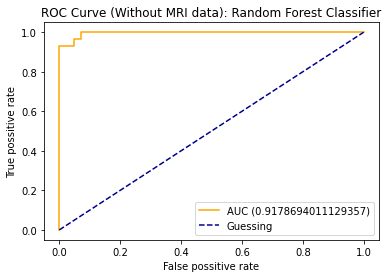

In [ ]:
clf.fit(x_train, y_train)
y_prob = clf.predict_proba(x_test)
y_prob_pos = y_prob[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob_pos, pos_label='Demented')
val = roc_auc_score(y_test, y_prob, multi_class='ovr')
plot_roc_curve(fpr,tpr, 'Random Forest Classifier', val)

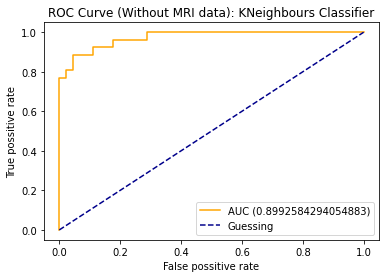

In [ ]:
knc.fit(x_train, y_train)
y_prob = knc.predict_proba(x_test)
y_prob_pos = y_prob[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob_pos, pos_label='Demented')
val = roc_auc_score(y_test, y_prob, multi_class='ovr')
plot_roc_curve(fpr,tpr, 'KNeighbours Classifier', val)

ROC curve of GaussianNB

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] priors=None, var_smoothing=1e-09 ................................
[CV] ................. priors=None, var_smoothing=1e-09, total=   0.0s
[CV] priors=None, var_smoothing=1e-09 ................................
[CV] ................. priors=None, var_smoothing=1e-09, total=   0.0s
[CV] priors=None, var_smoothing=1e-09 ................................
[CV] ................. priors=None, var_smoothing=1e-09, total=   0.0s
[CV] priors=None, var_smoothing=1e-09 ................................
[CV] ................. priors=None, var_smoothing=1e-09, total=   0.0s
[CV] priors=None, var_smoothing=1e-09 ................................
[CV] ................. priors=None, var_smoothing=1e-09, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


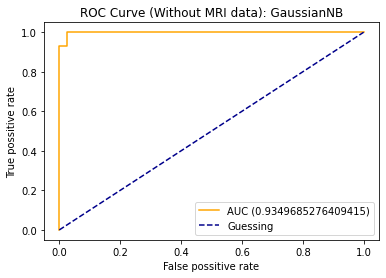

In [ ]:
cv_gnb.fit(x_train, y_train)
y_prob = cv_gnb.predict_proba(x_test)
y_prob_pos = y_prob[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob_pos, pos_label='Demented')
val = roc_auc_score(y_test, y_prob, multi_class='ovr')
plot_roc_curve(fpr,tpr, 'GaussianNB', val)

ROC curve of LogisticRegression

In [ ]:
'''import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fprD, tprD, fprN, tprN, name, val):
  plt.plot(fprD, tprD, color = "orange", label="AUC ({})".format(val))
  plt.plot([0,1],[0,1], color = "darkblue",linestyle="--",label="Guessing")
  plt.plot(fprN, tprN, color = "red", label="AUC ({})".format(val))
  plt.plot([0,1],[0,1], color = "darkblue",linestyle="--",label="Guessing")
  plt.xlabel("False possitive rate")
  plt.ylabel("True possitive rate")
  plt.title("ROC Curve (With MRI data)" + name)
  plt.legend()
  plt.show()'''

'import matplotlib.pyplot as plt\nfrom sklearn.metrics import roc_curve\nfrom sklearn.metrics import roc_auc_score\ndef plot_roc_curve(fprD, tprD, fprN, tprN, name, val):\n  plt.plot(fprD, tprD, color = "orange", label="AUC ({})".format(val))\n  plt.plot([0,1],[0,1], color = "darkblue",linestyle="--",label="Guessing")\n  plt.plot(fprN, tprN, color = "red", label="AUC ({})".format(val))\n  plt.plot([0,1],[0,1], color = "darkblue",linestyle="--",label="Guessing")\n  plt.xlabel("False possitive rate")\n  plt.ylabel("True possitive rate")\n  plt.title("ROC Curve (With MRI data)" + name)\n  plt.legend()\n  plt.show()'

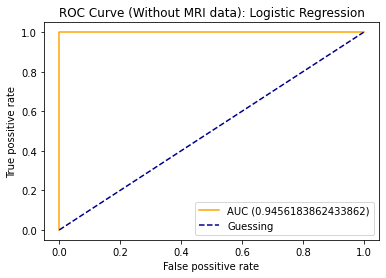

In [ ]:
lg.fit(x_train, y_train)
y_prob = lg.predict_proba(x_test)
y_prob_pos = y_prob[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob_pos, pos_label='Demented')
val = roc_auc_score(y_test, y_prob, multi_class='ovr')
plot_roc_curve(fpr,tpr, 'Logistic Regression', val)

ROC curve of AdaBoostClassifier

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] algorithm=SAMME, base_estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), n_estimators=1200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=SAMME, base_estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), n_estimators=1200, total=   0.2s
[CV] algorithm=SAMME, base_estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), n_estimators=1200, total=   0.3s
[CV] algorithm=SAMME, base_estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s finished


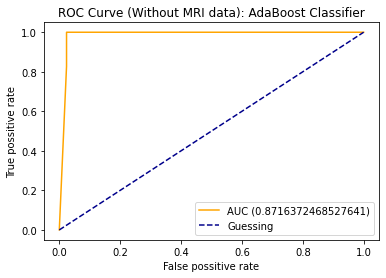

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(transfromed_X, y, test_size=0.2)
cv_ad.fit(x_train, y_train)
y_prob = cv_ad.predict_proba(x_test)
y_prob_pos = y_prob[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob_pos, pos_label='Demented')
val = roc_auc_score(y_test, y_prob, multi_class='ovr')
plot_roc_curve(fpr,tpr, 'AdaBoost Classifier', val)

ROC curve for LinearSVC

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, du

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

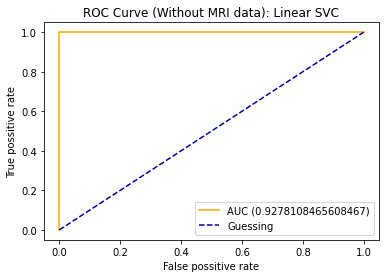

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
clsvc = CalibratedClassifierCV(cv_svm, cv=5)
clsvc.fit(x_train, y_train)
y_prob = clsvc.predict_proba(x_test)
y_prob_pos = y_prob[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob_pos, pos_label='Demented')
val = roc_auc_score(y_test, y_prob, multi_class='ovr')
plot_roc_curve(fpr,tpr, 'Linear SVC', val)

Hybrid Model

In [ ]:
from sklearn.ensemble import VotingClassifier
clsvc = CalibratedClassifierCV(cv_svm, cv=5)
clsvc.fit(x_train, y_train)
model = VotingClassifier(estimators=[('gnb', gnb), ('rf', clf), ('lg', lg), ('svc', clsvc), ('adb', adb)], voting='soft')
model.fit(x_train,y_train)
hybrid_score = model.score(x_test,y_test)
m_pred_y = model.predict(x_test)
evaluation_pred(y_test, m_pred_y)
hybrid_score

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, du

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, du

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


accuracy: 92.96%
percision 0.93
recall 0.93
f1: 0.93


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.9295774647887324

In [ ]:
import seaborn as sns
def plot_conf_mat(y_test, y_pred_lr):
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test, y_pred_lr),
                   annot=True,
                   cbar=False)
  plt.xlabel("True Label")
  plt.ylabel("Predicted label")

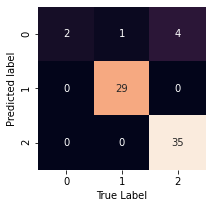

In [ ]:
plot_conf_mat(y_test, m_pred_y)

ROC curve of our hybrid model

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08, total=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=400, dual=False, loss=squared_hinge, multi_class=ovr, tol=1e-08 
[CV]  C=400, du

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

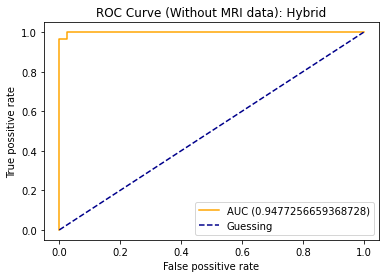

In [ ]:
model.fit(x_train, y_train)
y_prob = model.predict_proba(x_test)
y_prob_pos = y_prob[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob_pos, pos_label='Demented')
val = roc_auc_score(y_test, y_prob, multi_class='ovr')
plot_roc_curve(fpr,tpr, 'Hybrid', val)

compare all the models

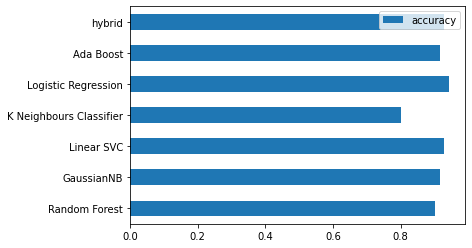

In [ ]:
model_scores['hybrid'] = hybrid_score
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot(kind='barh')

```
models = {
    "Random Forest": RandomForestClassifier( criterion= 'gini',
                  max_depth= 5,
                  max_features= 'auto',
                  min_samples_leaf= 2,
                  min_samples_split= 2,
                  n_estimators= 10),
    "GaussianNB": GaussianNB(priors= None, var_smoothing= 1e-08),
    "Linear SVC": LinearSVC(C= 500,
                dual= False,
                loss= 'squared_hinge',
                multi_class= 'ovr',
                tol= 1e-08),
    "K Neighbours Classifier": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(C= 225,
                      class_weight= 'balanced',
                      fit_intercept= True,
                      penalty= 'l2',
                      solver= 'liblinear',
                      tol= 1e-06),
    "Ada Boost": AdaBoostClassifier(algorithm = 'SAMME',
                                    base_estimator =  RandomForestClassifier( criterion= 'gini',
                                    max_depth= 5,
                                    max_features= 'auto',
                                    min_samples_leaf= 2,
                                    min_samples_split= 2,
                                    n_estimators= 10),
                        n_estimators = 1200)
}
```

